### Support Vector Regression

### Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

print("Libraries Imported !")

Libraries Imported !


### Feature Matrix

In [45]:
X = np.linspace(1,10,100).reshape(-1,1)
X[:10]

array([[1.        ],
       [1.09090909],
       [1.18181818],
       [1.27272727],
       [1.36363636],
       [1.45454545],
       [1.54545455],
       [1.63636364],
       [1.72727273],
       [1.81818182]])

In [46]:
Y = 5 * X[:, 0] ** 2 + np.random.uniform(0, 0.1, size=X.shape[0]) + np.sin(X[:, 0])
Y[:10]

array([ 5.90521397,  6.91006935,  8.00635336,  9.10670893, 10.30843531,
       11.65128149, 12.9689109 , 14.43017813, 15.91298354, 17.50101664])

### Standard Scaling

In [47]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaled = x_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(Y.reshape(-1,1)).flatten()

In [48]:
x_scaled[:10]

array([[-1.71481604],
       [-1.68017329],
       [-1.64553055],
       [-1.6108878 ],
       [-1.57624505],
       [-1.5416023 ],
       [-1.50695955],
       [-1.4723168 ],
       [-1.43767406],
       [-1.40303131]])

In [49]:
y_scaled[:10]

array([-1.21904385, -1.21223772, -1.20481231, -1.19735933, -1.18921974,
       -1.18012431, -1.17119968, -1.16130216, -1.15125875, -1.14050261])

### Model Training

In [50]:
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=3)
svr_rbf = SVR(kernel='rbf')

svr_linear.fit(x_scaled, y_scaled)
svr_poly.fit(x_scaled, y_scaled)
svr_rbf.fit(x_scaled, y_scaled)

SVR()

### Predicting Results

In [51]:
y_pred_linear = svr_linear.predict(x_scaled)
y_pred_poly = svr_poly.predict(x_scaled)
y_pred_rbf = svr_rbf.predict(x_scaled)

In [52]:
y_pred_linear[:10]

array([-1.71860785, -1.68476668, -1.65092552, -1.61708436, -1.58324319,
       -1.54940203, -1.51556086, -1.4817197 , -1.44787854, -1.41403737])

In [53]:
y_pred_poly[:10]

array([-2.42930568, -2.28432472, -2.14520077, -2.01181306, -1.88404082,
       -1.7617633 , -1.64485974, -1.53320936, -1.4266914 , -1.32518511])

In [54]:
y_pred_rbf[:10]

array([-1.10227906, -1.11191754, -1.11927751, -1.12437142, -1.12722656,
       -1.12788437, -1.12639954, -1.12283889, -1.11728025, -1.10981108])

### Visualizing Results

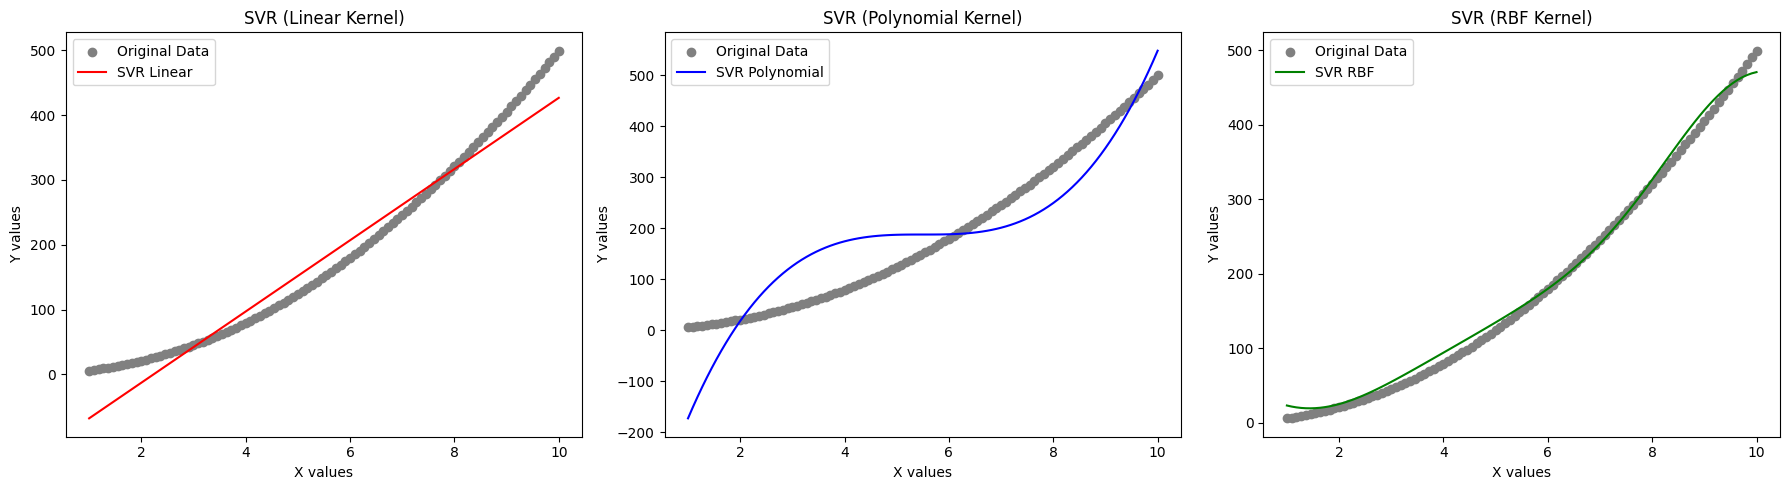

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Linear Kernel
axes[0].scatter(X, Y, color='gray', label='Original Data')
axes[0].plot(X, y_scaler.inverse_transform(y_pred_linear.reshape(-1, 1)), label='SVR Linear', color='red')
axes[0].set_title("SVR (Linear Kernel)")
axes[0].set_xlabel('X values')
axes[0].set_ylabel('Y values')
axes[0].legend()

# Polynomial Kernel
axes[1].scatter(X, Y, color='gray', label='Original Data')
axes[1].plot(X, y_scaler.inverse_transform(y_pred_poly.reshape(-1, 1)), label='SVR Polynomial', color='blue')
axes[1].set_title("SVR (Polynomial Kernel)")
axes[1].set_xlabel('X values')
axes[1].set_ylabel('Y values')
axes[1].legend()

# RBF Kernel
axes[2].scatter(X, Y, color='gray', label='Original Data')
axes[2].plot(X, y_scaler.inverse_transform(y_pred_rbf.reshape(-1, 1)), label='SVR RBF', color='green')
axes[2].set_title("SVR (RBF Kernel)")
axes[2].set_xlabel('X values')
axes[2].set_ylabel('Y values')
axes[2].legend()

plt.tight_layout()
plt.show()